## Installing the packages

There are available wheels for Linux, MacOS (Not windows yet). The supported python versions are **3.8.x** and **3.9.x**.
In the current version **PyDL8.5** is a dependency, so it will be installed automatically but this will change in the future.
The documentation is a work in progress and will be available soon.
You can install the package with pip:

In [1]:
!pip install -r requirements.txt # graphviz is only needed to print the tree

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 832.1/832.1 kB 524.8 kB/s eta 0:00:00a 0:00:01
  Using cached pandas-2.0.1-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.4 MB)
  Using cached pydl8.5-0.1.8-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (2.6 MB)
  Using cached scikit_learn-1.2.2-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (9.6 MB)
  Using cached seaborn-0.12.2-py3-none-any.whl (293 kB)
  Using cached pytz-2023.3-py2.py3-none-any.whl (502 kB)
  Using cached numpy-1.24.3-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)
  Using cached tzdata-2023.3-py2.py3-none-any.whl (341 kB)
  Using cached cvxpy-1.3.1-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (4.0 MB)
  Using cached Cython-0.29.34-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (2.0 MB)
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)
  Using cached scipy-1.10.1-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.w

## Using PyTrees to find Optimal decisions trees with DL8.5 algorithm

In [19]:
### Importing dependencies
import numpy as np
import graphviz
from pprint import pprint
from pytrees.optimal import DL85Classifier as RustDl85
from pytrees import (
                    Specialization,
                    Heuristic,
                    Branching
                    )

In [62]:
### Loading the dataset
dataset = np.genfromtxt("data/ionosphere.txt", delimiter=" ")
X, y = dataset[:, 1:], dataset[:, 0]

### Creating the model
There are several parameters that can be tuned to improve the performance of the algorithm. The most important ones are:
- **min_sup**: The minimum support of a node to be considered.
- **max_depth**: The maximum depth of the tree.
- **max_time**: The maximum time in seconds to run the algorithm.
- **specialization**: The specialization algorithm to use. The available options are:
    - **None_**: No specialization.
    - **MurTree**: MurTree specialization.
- **heuristic**: The heuristic to use. The available options are:
    - **None_**: No heuristic.
    - **InformationGain**: InformationGain heuristic.
    - **InformationGainRatio**: InformationGainRatio heuristic.
    - **GiniIndex**: Gini Index heuristic.
- **one_time_sort**: Whether to sort the features only once using the heuristic.
- **branching**: Whether to use dynamic branching. The available options are:
    - **None_**: No branching.
    - **Dynamic**: Dynamic branching.

In [5]:
### Creating the model
clf = RustDl85(
    min_sup=1,
    max_depth=3,
    max_time=600, # 10 minutes
    specialization=Specialization.MurTree, # MurTree specialization or None_ for no specialization
    heuristic=Heuristic.None_, # InformationGain heuristic or None_ for no heuristic
    one_time_sort=True, # Sort the features only once using the heuristic
    branching=Branching.Dynamic, # Dynamic branching or None_ for no branching
)

### Fitting the model

The model is compatible with the scikit-learn API, so it can be used with the same methods as the scikit-learn models.

In [7]:
print("Fitting the model")
clf.fit(X, y)
print("Done")

Fitting the model
Done
Distribution: [187, 625]


In [10]:
### Printing the statistics
pprint(clf.statistics)

{'cache_size': 795,
 'constraints': {'branching': 'Dynamic',
                 'cache_init': 'WithMemoryDynamic',
                 'cache_init_size': 0,
                 'discrepancy_budget': 0,
                 'discrepancy_strategy': 'None',
                 'lower_bound': 'Similarity',
                 'max_depth': 3,
                 'max_error': 18446744073709551615,
                 'max_time': 600,
                 'min_sup': 1,
                 'one_time_sort': True,
                 'specialization': 'Murtree'},
 'duration': {'nanos': 69945575, 'secs': 0},
 'num_attributes': 93,
 'num_samples': 812,
 'train_distribution': [187, 625],
 'tree_error': 112}


### Computing the accuracy
Using the scikit-learn API, the accuracy can be computed with the `score` method.

In [14]:
### Computing the accuracy
print("Accuracy:", clf.score(X, y))

Accuracy: 0.8620689655172413


### Printing the tree
The tree can be printed using the `export_to_graphviz_dot` method.

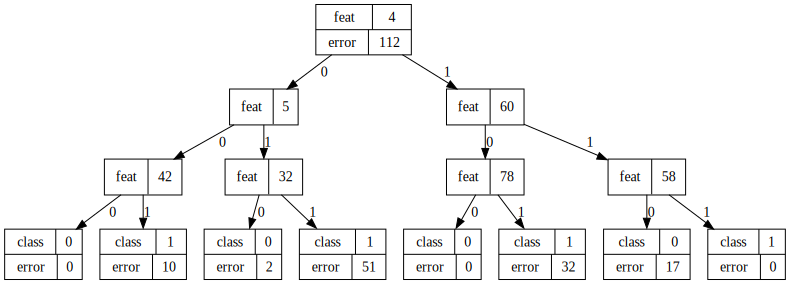

In [13]:
 ### Printing the tree
dot = clf.export_to_graphviz_dot()
source = graphviz.Source(dot)
source

## Using PyTrees to find Less Greedy Decision Trees with LGDT algorithm

In [20]:
from pytrees.lgdt import LGDTClassifier
from pytrees import (
                    DataStructure,
                    FitMethod
                    )

### Creating the model
There are several parameters that can be tuned to improve the performance of the algorithm. The most important ones are:
- **min_sup**: The minimum support of a node to be considered.
- **max_depth**: The maximum depth of the tree.
- **parallel**: Whether to use parallelism (Can be buggy du to extensive tree generation on leaves).
- **data_structure**: Data structure to use. The available options are:
    - **Bitset**: Bitset data structure.
    - **ReversibleBitset**: Reversible Bitset data structure.
    - **Raw**: Using Raw Data.
    - **Horizontal**: Horizontal data structure.
- **fit_method**: Fit method to use. The available options are:
    - **MurTree**: MurTree fit method.
    - **InfoGain**: Information Gain fit method.

In [21]:
### Creating the model
clf_lgdt = LGDTClassifier(
    min_sup=1,
    max_depth=3,
    parallel=False, # Whether to use parallelism (Can be buggy du to extensive tree generation on leaves)
    data_structure=DataStructure.ReversibleBitset, # Data structure to use.
    fit_method=FitMethod.MurTree, # Fit method to use.
)

In [22]:
### Fitting the model
print("Fitting the model")
clf_lgdt.fit(X, y)
print("Done")

Fitting the model
Done


In [23]:
### Printing the statistics
pprint(clf_lgdt.statistics)

{'duration': {'nanos': 5041152, 'secs': 0},
 'duration_milliseconds': 5,
 'error': 119}


In [24]:
### Computing the accuracy
print("Accuracy:", clf_lgdt.score(X, y))

Accuracy: 0.853448275862069


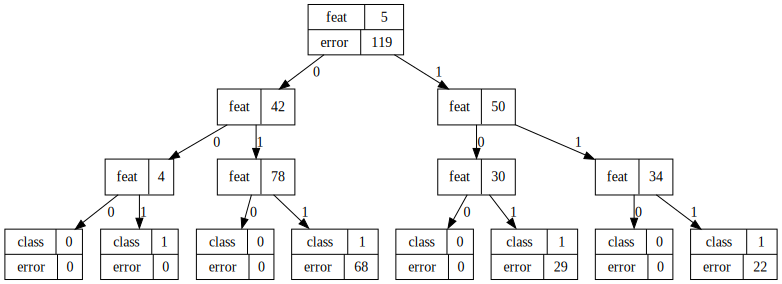

In [25]:
### Printing the tree
dot = clf_lgdt.export_to_graphviz_dot()
source = graphviz.Source(dot)
source

## Comparing performance of rust and c++ implementations

Here we compare the performance of the rust and c++ implementations of the DL8.5 algorithm.

In [27]:
import time
from pytrees.optimal import DL85Classifier as RustDl85
from pydl85 import DL85Classifier as CppDl85
from pytrees import (
                    Specialization,
                    Heuristic,
                    Branching
                    )

In [63]:
### Parameters
support = 1
max_depth = 3
time_limit = 600 # 10 minutes

In [64]:
### Creating the rust model
clf_rust = RustDl85(
    min_sup=support,
    max_depth=max_depth,
    max_time=time_limit, # 10 minutes
    specialization=Specialization.MurTree, # MurTree specialization or None_ for no specialization
    heuristic=Heuristic.None_, # InformationGain heuristic or None_ for no heuristic
    one_time_sort=True, # Sort the features only once using the heuristic
    branching=Branching.Dynamic, # Dynamic branching or None_ for no branching
)

In [65]:
### Creating the c++ model
clf_cpp = CppDl85(
    min_sup=support,
    max_depth=max_depth,
    time_limit=time_limit, # 10 minutes
    print_output=False
)

In [66]:
models = {
    "Rust": clf_rust,
    "C++": clf_cpp
}

for name, model in models.items():
    # Fitting the model
    print("Fitting the", name, "model")
    start = time.time()
    model.fit(X, y)
    end = time.time()
    print("Done")
    # Printing time in milliseconds
    print("Time:", (end - start) * 1000, " ms")

Fitting the Rust model
Done
Time: 9691.307783126831  ms
Fitting the C++ model
Done
Time: 6549.895763397217  ms


### Next Features

- Investigate Caching strategy for speed up (At first there was an overhead because of some iterator, but now it's not the case. The list copy might be a problem)
- Itemset identification (Expected negligible speed up)
- Add support for Windows.
- Allow external function from python to rust to compute metrics on database
- Implement Blossom Algorithm (With and without caching)
- Memory Constrained Cache ?
